## Importing packages

In [1]:
%matplotlib notebook
from matplotlib.figure import Figure
import matplotlib as mpl
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

## Setting up endowments and tax rates

### Defining task endowments

In [2]:
from subprocess import run
import sys

controls_path = "D:\Accesos directos\Trabajo\GECE - LEEX\Kristian\Brown\klo_lp_apps\MoneyPolitics\progressivity_pres"

sys.path.insert(0, controls_path)
import controls as ctrl

In [3]:
original_task_endowments = ctrl.task_endowments
unique_task_endowments = list(set(ctrl.task_endowments))
unique_task_endowments.sort()
unique_task_endowments

[9, 15, 25, 40, 80, 125]

### Defining tax rates

In [5]:
tax_rates = []
step = 20
for i in range(0, step + 1, 1):
    tax_rates.append(i/step)

In [6]:
tax_rates

[0.0,
 0.05,
 0.1,
 0.15,
 0.2,
 0.25,
 0.3,
 0.35,
 0.4,
 0.45,
 0.5,
 0.55,
 0.6,
 0.65,
 0.7,
 0.75,
 0.8,
 0.85,
 0.9,
 0.95,
 1.0]

## Payoffs data

In [7]:
payoffs_path = "D:\Accesos directos\Trabajo\GECE - LEEX\Kristian\Brown\klo_lp_apps\MoneyPolitics\progressivity_pres/final_payoffs_table.xlsx"
final_payoffs = pd.read_excel(payoffs_path)
final_payoffs.reset_index(drop=True, inplace=True)
final_payoffs.head()

,tax,final_payoff_9,final_payoff_15,final_payoff_25,final_payoff_40,final_payoff_80,final_payoff_125
0,0,25.423,39.247,60.586,90.339,162.836,237.957
1,5,189.129,291.671,449.968,670.675,1208.459,1765.704
2,10,313.574,483.335,745.399,1110.784,2001.099,2923.629
3,15,416.787,641.991,989.645,1474.363,2655.451,3879.277
4,20,503.418,774.712,1193.516,1777.436,3200.244,4674.536


<IPython.core.display.Javascript object>


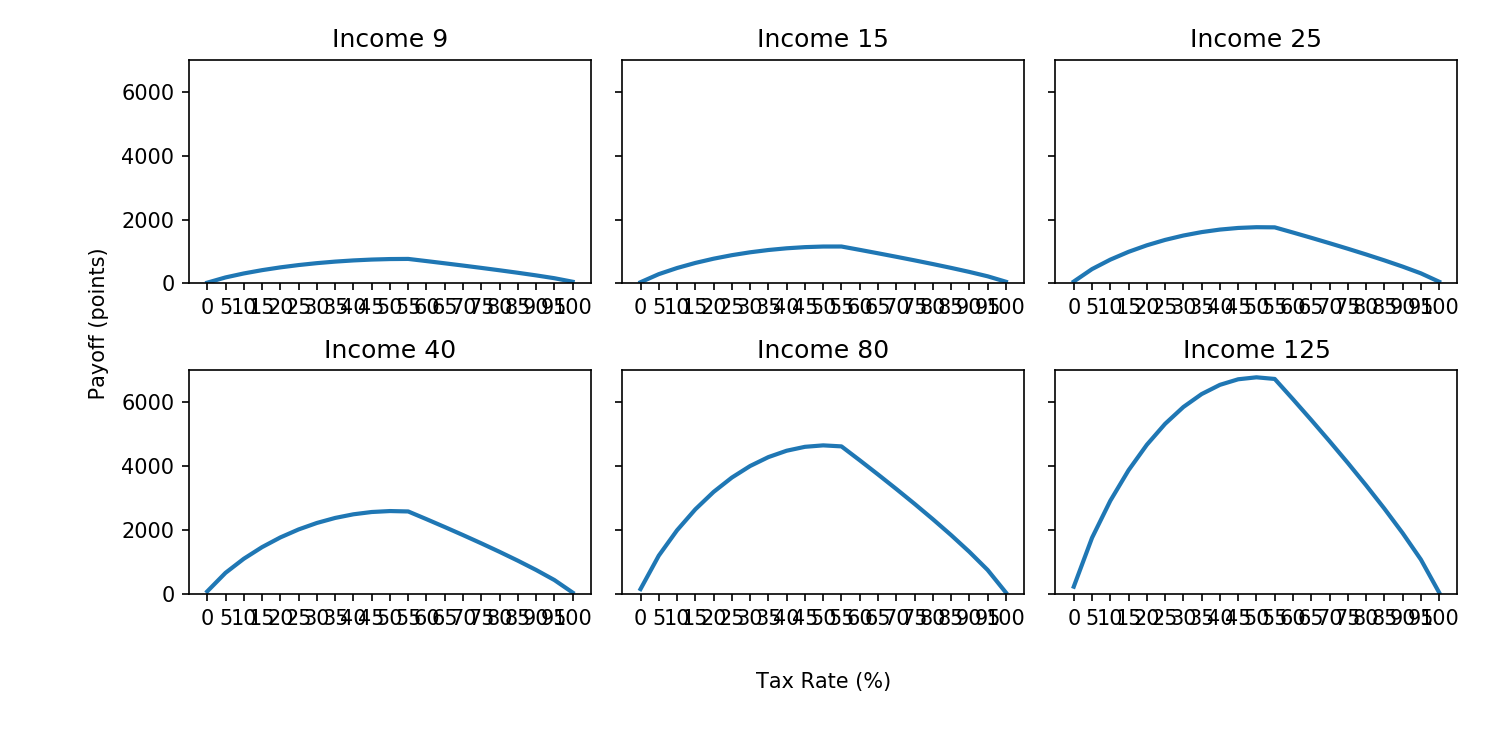

In [8]:
# creating a set of subplots
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, sharex=False, sharey=True, figsize=(10, 5))

# add a big axes, hide frame
fig.add_subplot(111, frameon=False)

axs = [ax1,ax2,ax3,ax4,ax5,ax6] # storing a subplot for each progressivity level

# plotting all subplots
for n_axis in range(1, len(axs) + 1):
    task_endowment = unique_task_endowments[n_axis-1]
    xvals = [tax_rate*100 for tax_rate in tax_rates] # calling our tax rates for a progressivity level
    
    axs[n_axis-1].plot(xvals, final_payoffs[f"final_payoff_{task_endowment}"], linewidth = 2)
    
    axs[n_axis-1].set_ylim(0, 7000) # setting the y axis limit from 0% to 100%
    axs[n_axis-1].set_title(f"Income {task_endowment}") # setting the title of each subplot as to their respective level   
    
# hiding big subplot tick and tick label of the big axes
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
plt.tight_layout(pad=1.0)

# stablishing the x and y titles
plt.xlabel("Tax Rate (%)")
plt.tick_params(axis='x', which='major', pad=20) # spacing between x-axis ticks and name
plt.ylabel(" Payoff (points)")
plt.tick_params(axis='y', which='major', pad=15) # spacing between y-axis ticks and name
#plt.title("Possible Incomes without messaging")

# # setting up the progressivity plots
plt.setp(axs, xticks=[tax_rate*100 for tax_rate in tax_rates], xticklabels=[round(tax_rate*100) for tax_rate in tax_rates])

fig.tight_layout(pad=1.0) # adding some spacing between subplots
#fig.savefig('..\_static\MoneyPolitics\Income plots.png')

## Dissagregating the public payoffs (G)

### Obtaining H(T)

In [11]:
# calculating total public contributions 
total_public_contributions = []

for tax_rate in tax_rates:
    current_public_contribution = 0 # public contrib for current tax rate
    
    for endowment in original_task_endowments:
        current_public_contribution += tax_rate*endowment # calculating public contrib for current tax rate
        
    total_public_contributions.append(current_public_contribution) # storing current public contrib

In [12]:
total_public_contributions

[0.0,
 17.45,
 34.9,
 52.35,
 69.8,
 87.25,
 104.7,
 122.15,
 139.6,
 157.05,
 174.5,
 191.95,
 209.4,
 226.85,
 244.3,
 261.75,
 279.2,
 296.65,
 314.1,
 331.55,
 349.0]

In [13]:
theta = 0.025 # theta from original functions

In [14]:
# storing public incomes (H) and private productivities (part of R)
public_incomes = []
private_productivities = []

for total_public_contribution in total_public_contributions:
    
    if total_public_contribution <= 192:
        # public income for current total contribution
        public_incomes.append(101 / (1 + 100 * math.exp(-theta * total_public_contribution)) - 1)
        # private productivity for current total contribution
        private_productivities.append(ctrl.alpha + ctrl.beta*total_public_contribution)
    else:
        public_incomes.append(101 / (1 + 100 * math.exp(-theta * 192)) - 1)
        private_productivities.append(ctrl.alpha + ctrl.beta*192)

In [17]:
private_productivities

[5.0,
 55.605,
 106.21,
 156.815,
 207.42,
 258.025,
 308.63,
 359.235,
 409.84,
 460.445,
 511.05,
 561.655,
 561.8,
 561.8,
 561.8,
 561.8,
 561.8,
 561.8,
 561.8,
 561.8,
 561.8]

In [18]:
gamma = 0.85 # gamma from original functions

In [19]:
private_incomes = {}

for task_endowment in unique_task_endowments:
    index = 0 # index for calling the private productivity that corresponds to an specific tax rate
    
    private_incomes[f"private_incomes_{task_endowment}"] = [] # list with all the private incomes for a player
    
    for tax_rate in tax_rates: # calculating all the private incomes for an specific player
        private_income = ((task_endowment*(1-tax_rate))**(gamma))*(private_productivities[index])**(gamma)
        private_incomes[f"private_incomes_{task_endowment}"].append(round(private_income, 3))
        index += 1

In [20]:
private_incomes

{'private_incomes_9': [25.423,
  188.59,
  312.214,
  414.182,
  498.948,
  568.618,
  624.399,
  667.044,
  697.039,
  714.686,
  720.153,
  713.487,
  645.657,
  576.379,
  505.596,
  433.012,
  358.2,
  280.497,
  198.724,
  110.249,
  0.0],
 'private_incomes_15': [39.247,
  291.132,
  481.975,
  639.386,
  770.242,
  877.793,
  963.903,
  1029.736,
  1076.04,
  1103.283,
  1111.721,
  1101.431,
  996.72,
  889.774,
  780.504,
  668.453,
  552.965,
  433.012,
  306.776,
  170.195,
  0.0],
 'private_incomes_25': [60.586,
  449.429,
  744.039,
  987.04,
  1189.046,
  1355.076,
  1488.006,
  1589.634,
  1661.115,
  1703.172,
  1716.198,
  1700.313,
  1538.666,
  1373.572,
  1204.888,
  1031.912,
  853.629,
  668.453,
  473.58,
  262.735,
  0.0],
 'private_incomes_40': [90.339,
  670.136,
  1109.424,
  1471.758,
  1772.966,
  2020.531,
  2218.742,
  2370.277,
  2476.862,
  2539.571,
  2558.995,
  2535.309,
  2294.28,
  2048.11,
  1796.588,
  1538.666,
  1272.832,
  996.72,
  706.148,
  

In [89]:
g_values = {}

for task_endowment in unique_task_endowments:
    index = 0 # index for calling the private productivity that corresponds to an specific tax rate
    
    g_values[f"player_end_{task_endowment}"] = [] # list with all the private incomes for a player
    
    # calculating all the g function values per player
    for index in range(len(tax_rates)): 
        g_values[f"player_end_{task_endowment}"].append(private_incomes[f"private_incomes_{task_endowment}"][index] + public_incomes[index])
        

In [90]:
g_values

{'player_end_9': [25.423,
  29.321564441332974,
  32.98133435122671,
  36.573114435128986,
  40.31395618809641,
  44.480042268895374,
  49.40385992784171,
  55.425005626537036,
  62.79073456853531,
  71.49273719752883,
  81.12147149717663,
  90.86068356742152,
  87.42095032822436,
  83.87795032822436,
  80.25895032822436,
  76.54695032822437,
  72.72095032822436,
  68.74795032822436,
  64.56595032822436,
  60.04195032822436,
  54.40395032822436],
 'player_end_15': [39.247,
  44.97156444133297,
  50.17533435122671,
  55.043114435128984,
  59.8029561880964,
  64.74104226889538,
  70.1918599278417,
  76.50100562653704,
  83.91573456853531,
  92.42973719752882,
  101.63047149717663,
  110.70068356742152,
  105.37295032822436,
  99.90495032822436,
  94.31695032822435,
  88.58695032822436,
  82.68095032822436,
  76.54695032822437,
  70.09195032822436,
  63.10695032822436,
  54.40395032822436],
 'player_end_25': [60.586,
  69.13156444133297,
  76.71733435122671,
  83.55511443512898,
  89.8899